https://www.sdss.org/dr16/irspec/spectro_data/

In [2]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [3]:
import sys
print(sys.executable)

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns 

from pprint import pprint

import starcolorindexSpT

print("\nInitialize!")

/Library/Frameworks/Python.framework/Versions/3.6/bin/python3

Initialize!


In [4]:
Ipython_default = plt.rcParams.copy()

#plt.style.use('dark_background')

# reset rcParams
#plt.rcParams.update(Ipython_default)

In [5]:
from datetime import datetime

def timer_start():
  global start_time
  start_time = datetime.now()

def timer_stop():
  time_elapsed = datetime.now() - start_time

  da, remainder  = divmod(time_elapsed.total_seconds(), 24*3600)
  hrs, remainder = divmod(remainder, 3600)
  mins, secs = divmod(remainder, 60)
    
  print("\n")

  if da:
      print(f'{int(da)} days {int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif hrs:
      print(f'{int(hrs)} hours {int(mins)} minutes {int(secs)} seconds elapsed')
  elif mins:
      print(f'{int(mins)} minutes {int(secs)} seconds elapsed')
  elif secs >= 1.0:
      print(f'{int(secs)} seconds elapsed')
  else:
      print(f'{secs:.2} seconds elapsed')
        
print('\ntimer functions loaded')


timer functions loaded


In [6]:
def ChartHistElement(r, rClass, r2, r2Class, rElement):
    x1 = eval("r[(r['"+ str(rElement) + "'].astype(float) > -9999)]")
    s1Label = rElement
    
    xx1 = eval("x1['"+ str(rElement) + "'].astype(float)")
    
    x2 = eval("r2[(r2['"+ str(rElement) + "'].astype(float) > -9999)]")
    
    xx2 = eval("x2['"+ str(rElement) + "'].astype(float)") 
    
    rLow = -1
    rHi  = 1
    
    plt.style.use('dark_background')
    
    plt.rcParams["figure.figsize"] = (12, 6)
    sns.distplot(xx1[(xx1 >= rLow) & (xx1 <= rHi)], color='r', hist=True,  
                    label=s1Label.strip() + " " + str(rClass) + " Stars " + str(x1.shape[0]))
    sns.distplot(xx2[(xx2 >= rLow) & (xx2 <= rHi)], color='b', hist=True,  
                    label=s1Label.strip() + " " + str(r2Class)  + " Stars " + str(x2.shape[0]))
    plt.xlabel(s1Label, fontsize=13)
    plt.title(str(field_name) + ' Field ['  + str(field)+ ']'+ '\n  ' + str(field_list) , fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    L=plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5), fontsize=13);
    plt.show()
    
    print("\n" + s1Label.strip() + " " + str(rClass)  +  " " + str(round(xx1.mean(),2)))
    print(s1Label.strip() + " " + str(r2Class)  +  " " + str(round(xx2.mean(),2)))
    
    print("\n" + s1Label.strip() + " " + str(rClass)  +  " kpc " + str(round(r.kpc.mean(),2)))
    print(s1Label.strip() + " " + str(r2Class)  +  " kpc " + str(round(r2.kpc.mean(),2)))

In [7]:
timer_start()

df_Apogee = pd.read_csv('allStarLite-r12-133.csv')

df_Apogee['BP_RP']   = df_Apogee['GAIA_PHOT_BP_MEAN_MAG']  - df_Apogee['GAIA_PHOT_RP_MEAN_MAG']
df_Apogee['SpT2'] = df_Apogee.apply(lambda row: starcolorindexSpT.subclass[round(row.BP_RP, 2)], axis=1)
df_Apogee['Parsec'] =  abs(((1 / df_Apogee['GAIA_PARALLAX']) * 1000))
df_Apogee['kpc'] =  abs(((1 / df_Apogee['GAIA_PARALLAX'])))
df_Apogee['LY'] = abs(3261.56/df_Apogee['GAIA_PARALLAX'])
df_Apogee['kly'] = abs(3.26156/df_Apogee['GAIA_PARALLAX'])

# calculate absolute magnitude and add a new column (M)
df_Apogee['M'] = df_Apogee['GAIA_PHOT_G_MEAN_MAG'] + 5*np.log10(df_Apogee['GAIA_PARALLAX']) - 10
#df_Apogee['M'].describe()

# add a new column ('L_sun') for luminosity in terms of multiples of solar luminosity
df_Apogee['L_sun'] = np.power(10,[(4.77-m)/2.5 for m in df_Apogee['M']])

# add a new column ('T_K') for effective temperature in Kelvin
df_Apogee['T_K'] = [5601/np.power(c+0.4,2/3) for c in df_Apogee['BP_RP']]

df_Apogee['R_sun']=np.around(np.sqrt(df_Apogee['L_sun'])/(df_Apogee['T_K']/5800)**2, decimals=2) # T_☉ = 5800

timer_stop()



30 seconds elapsed


In [8]:
timer_start()

conditions = [
    (df_Apogee['LOGG'].astype(float) > 4.20),
    ((df_Apogee['LOGG'].astype(float) <= 4.20) & (df_Apogee['LOGG'].astype(float) > 3.90)),
    ((df_Apogee['LOGG'].astype(float) <= 3.90) & (df_Apogee['LOGG'].astype(float) > 3.60)),
    ((df_Apogee['LOGG'].astype(float) < 2.55) & (df_Apogee['LOGG'].astype(float) > 2.35)),
    (df_Apogee['LOGG'].astype(float) <= 3.60)
]

values = ['main_sequence', 'turnoff', 'subgiants', 'red_clump', 'red_giants']

df_Apogee['Star_Type'] = np.select(conditions, values)

timer_stop()



0.1 seconds elapsed


In [23]:
#df_Apogee.columns.sort_values().tolist()

In [22]:
#df_Apogee.head()

In [9]:
fields = df_Apogee['FIELD']
unique_fields = np.unique(fields.astype(str))

print("\nFields: " + str(unique_fields.shape[0]))

unique_fields_sorted = np.sort(unique_fields)


Fields: 1366


In [13]:
################################################################################################################################################


field_list = [[0, 0]]
alpha_field_list = []

for field in unique_fields_sorted:
    f1 = df_Apogee[df_Apogee['FIELD'] == field]
    
    f1_ra = f1['RA'].mean()
    f1_dec = f1['DEC'].mean()
    
    #f1_Ca_fe = f1['CA_FE'].mean()
    #f1_Ti_fe = f1['TI_FE'].mean()
    #f1_Mg_fe = f1['MG_FE'].mean()
    #f1_Si_fe = f1['SI_FE'].mean()
    
    f1_Ca_fe = f1[f1.Star_Type == 'red_giants'].CA_FE.mean()
    f1_Ti_fe = f1[f1.Star_Type == 'red_giants'].TI_FE.mean()
    f1_Mg_fe = f1[f1.Star_Type == 'red_giants'].MG_FE.mean()
    f1_Si_fe = f1[f1.Star_Type == 'red_giants'].SI_FE.mean()
    
    #f1_Ca_fe = f1[f1.Star_Type == 'main_sequence'].CA_FE.mean()
    #f1_Ti_fe = f1[f1.Star_Type == 'main_sequence'].TI_FE.mean()
    #f1_Mg_fe = f1[f1.Star_Type == 'main_sequence'].MG_FE.mean()
    #f1_Si_fe = f1[f1.Star_Type == 'main_sequence'].SI_FE.mean()
    
    #f1_alpha = round(f1_Ca_fe + f1_Ti_fe + f1_Mg_fe + f1_Si_fe, 2)
    #f1_alpha = round(f1_Ca_fe, 4)
    #f1_alpha = round(f1_Ti_fe, 4)
    f1_alpha = round(f1_Mg_fe, 4)
    #f1_alpha = round(f1_Si_fe, 4)
    
    
    field_list +=  [[f1_alpha, str(field)]]
    
top_alpha_field_list = sorted(field_list, reverse = True)

print("\nTop Alpha Apogee fields\n")

for i in range(0,10):
    pprint(top_alpha_field_list[i][1])

print("\n")

for i in range(0,10):
    alpha_field_list += [top_alpha_field_list[i][1]]
    


Top Alpha Apogee fields

'misc'
0
'350+12'
'034+06'
'340+06'
'037+85_MGA'
'300+04'
'025-06'
'149+62_MGA'
'075+35'




In [ ]:
"""element_cols = [
    'AL_FE', 'C_FE', 'CA_FE', 'CE_FE', 'CI_FE', 'CO_FE', 'CR_FE', 'CU_FE', 
    'K_FE', 'MN_FE', 'N_FE', 'NA_FE', 'NI_FE', 'O_FE', 'P_FE', 'S_FE', 
    'TI_FE', 'TIII_FE', 'V_FE', 'MG_FE', 'SI_FE'
] """

In [11]:
#element_cols3 = ['MG_FE', 'SI_FE', 'CA_FE', 'TI_FE']

In [14]:
element_cols3 = [ 'MG_FE']

In [13]:
#element_cols3 = [ 'SI_FE']

In [ ]:
#element_cols3 = [ 'CA_FE']

In [ ]:
#element_cols3 = [ 'TI_FE']


Starting HR Diagram Plotting Loop


Field [misc]  Ra [42.38]  Dec [64.9]

Stars: 2
main_sequence: 0
turnoff: 0
subgiants: 0
red_clump: 1
red_giants: 1


Field [0]  Ra [nan]  Dec [nan]

Stars: 0
main_sequence: 0
turnoff: 0
subgiants: 0
red_clump: 0
red_giants: 0


Field [350+12]  Ra [248.57]  Dec [-29.9]

Stars: 514
main_sequence: 21
turnoff: 2
subgiants: 4
red_clump: 103
red_giants: 384

R_sun Max: 618.69


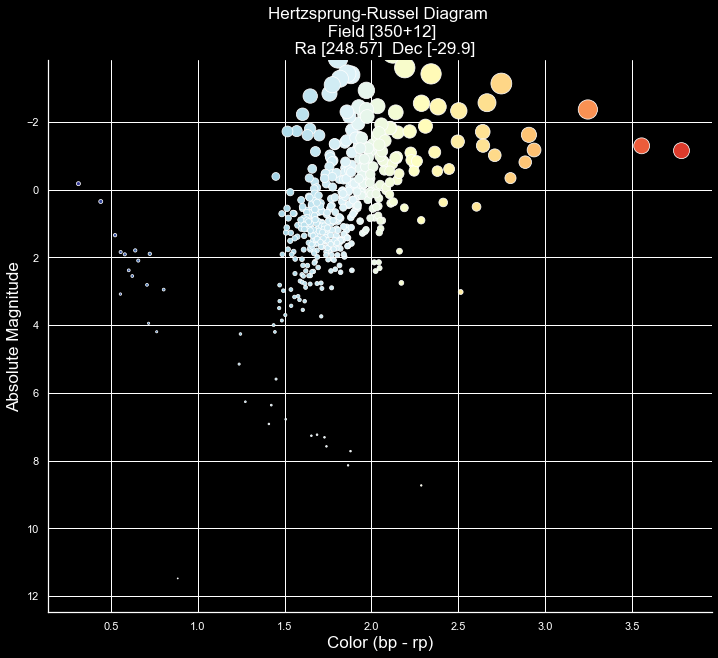

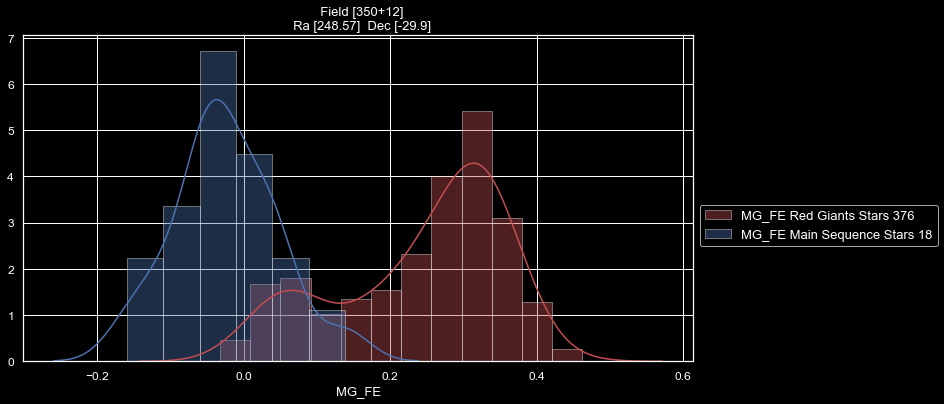


MG_FE Red Giants 0.24
MG_FE Main Sequence -0.02

MG_FE Red Giants kpc 13.18
MG_FE Main Sequence kpc 0.4


Field [034+06]  Ra [278.13]  Dec [3.59]

Stars: 727
main_sequence: 18
turnoff: 4
subgiants: 6
red_clump: 153
red_giants: 546

R_sun Max: 5206.54


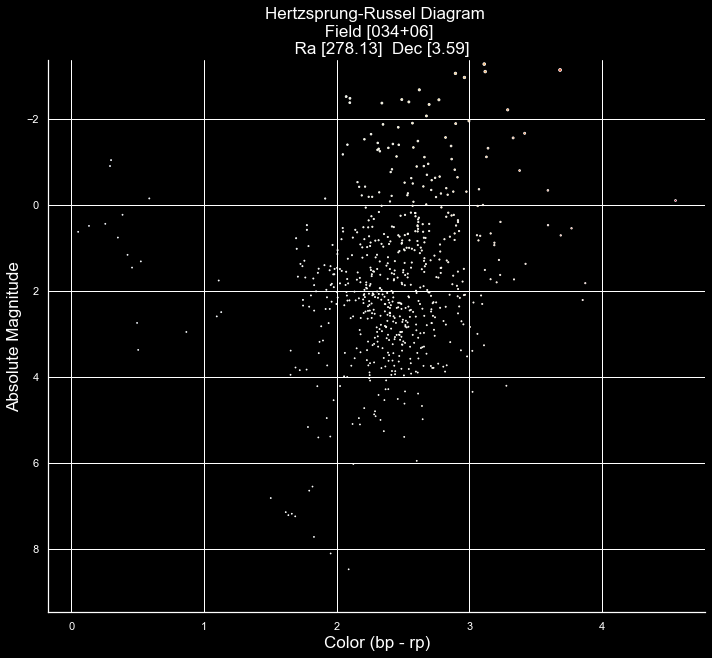

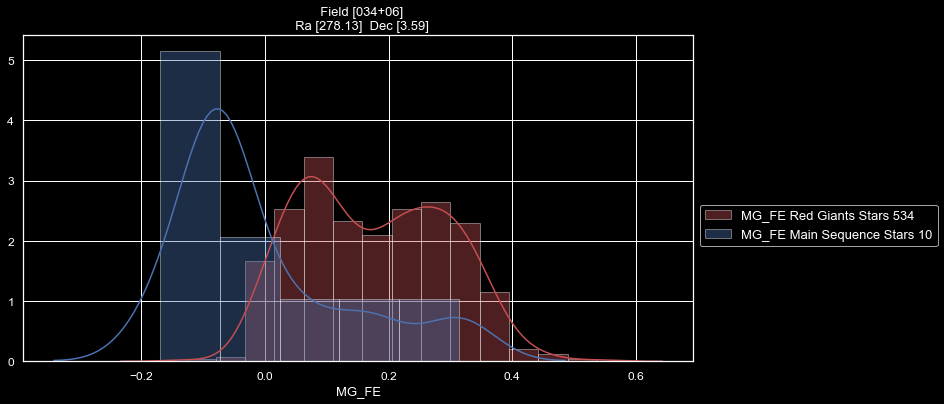


MG_FE Red Giants 0.18
MG_FE Main Sequence -0.01

MG_FE Red Giants kpc 61.71
MG_FE Main Sequence kpc 0.47


Field [340+06]  Ra [245.66]  Dec [-41.33]

Stars: 618
main_sequence: 16
turnoff: 4
subgiants: 5
red_clump: 108
red_giants: 485

R_sun Max: 3023.44


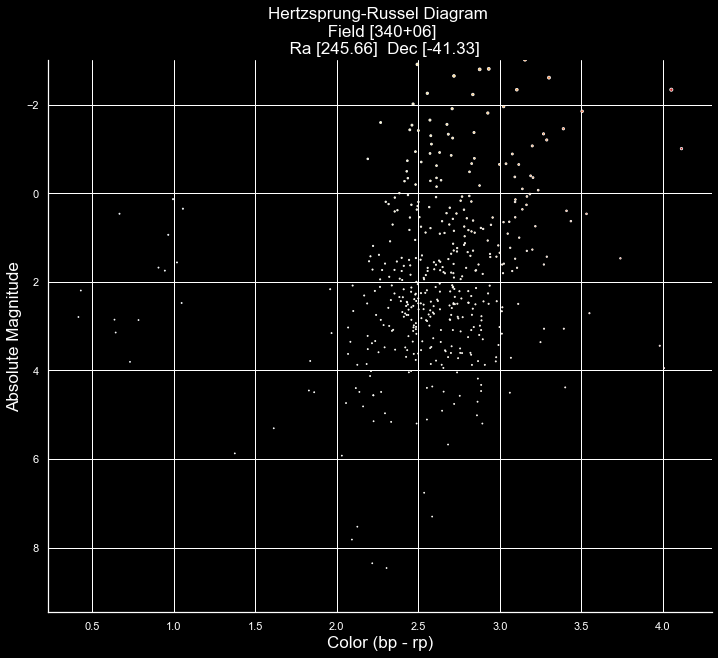

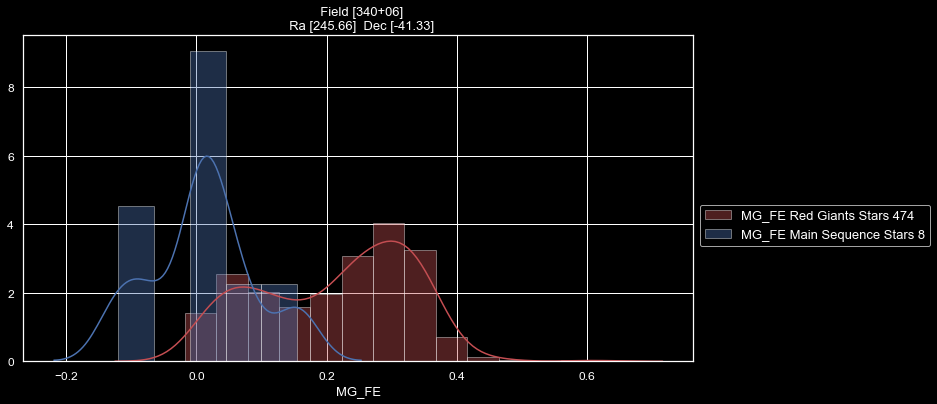


MG_FE Red Giants 0.21
MG_FE Main Sequence 0.01

MG_FE Red Giants kpc 25.84
MG_FE Main Sequence kpc 0.45


Field [037+85_MGA]  Ra [198.23]  Dec [27.36]

Stars: 262
main_sequence: 150
turnoff: 42
subgiants: 13
red_clump: 13
red_giants: 44

R_sun Max: 145.84


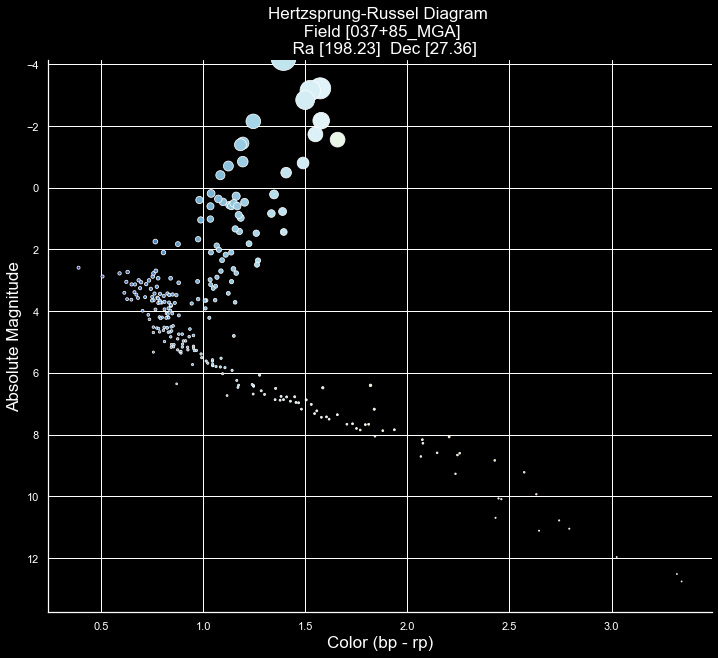

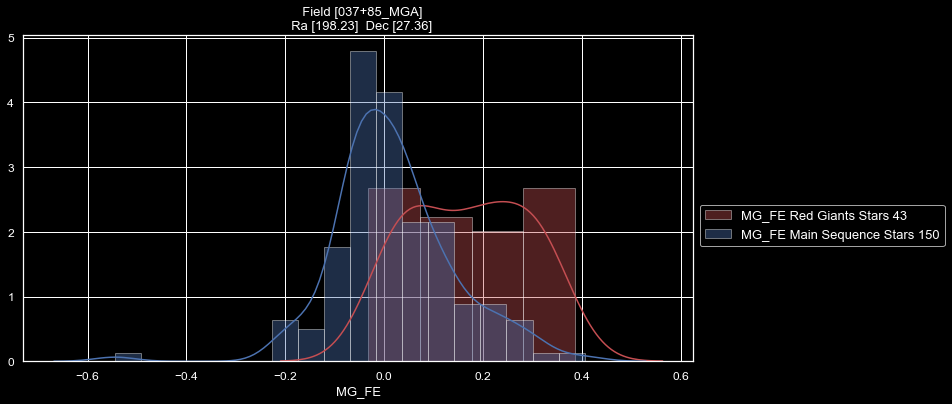


MG_FE Red Giants 0.17
MG_FE Main Sequence 0.02

MG_FE Red Giants kpc 3.27
MG_FE Main Sequence kpc 0.23


Field [300+04]  Ra [187.35]  Dec [-58.41]

Stars: 747
main_sequence: 19
turnoff: 2
subgiants: 2
red_clump: 156
red_giants: 568

R_sun Max: 8664.31


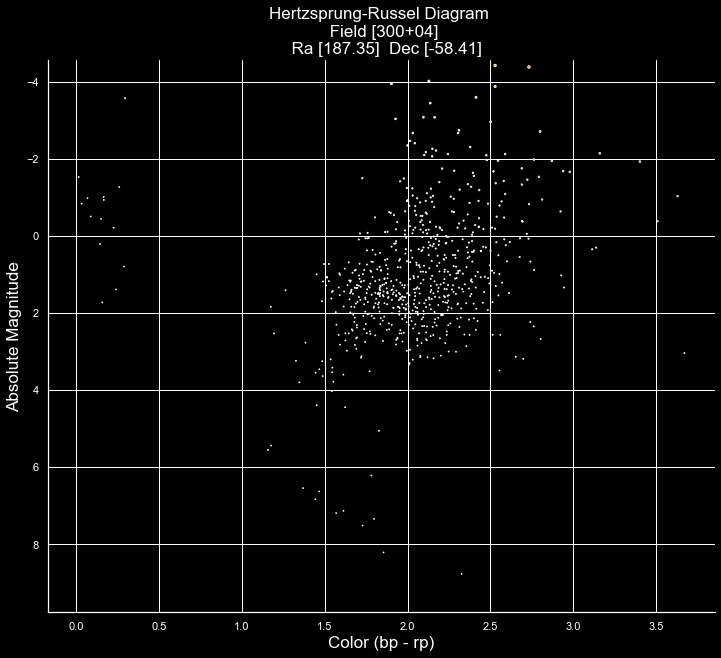

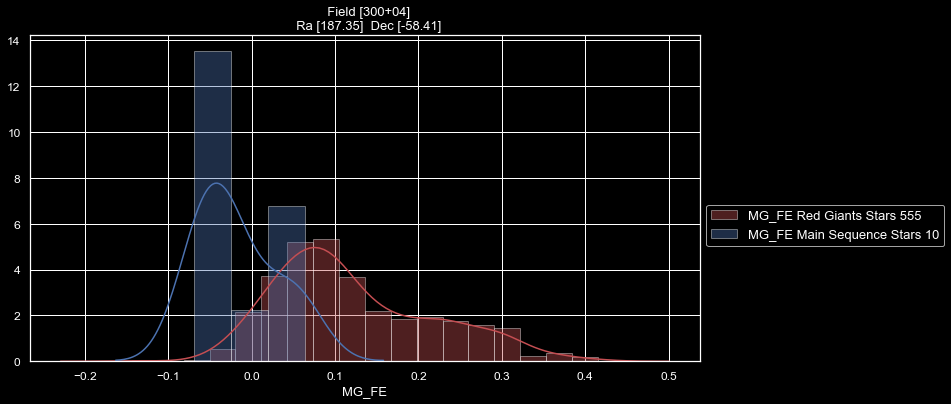


MG_FE Red Giants 0.12
MG_FE Main Sequence -0.02

MG_FE Red Giants kpc 27.21
MG_FE Main Sequence kpc 0.54


Field [025-06]  Ra [284.51]  Dec [-9.76]

Stars: 708
main_sequence: 12
turnoff: 2
subgiants: 2
red_clump: 141
red_giants: 551

R_sun Max: 742.74


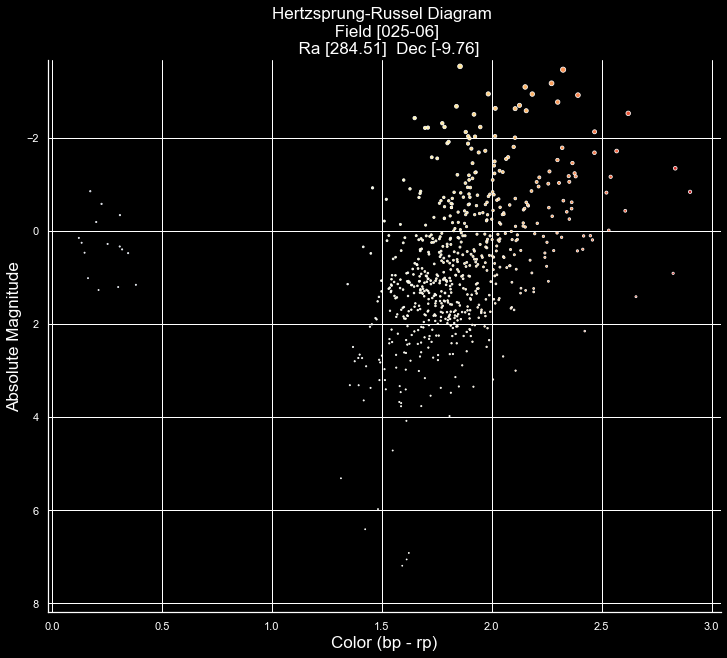

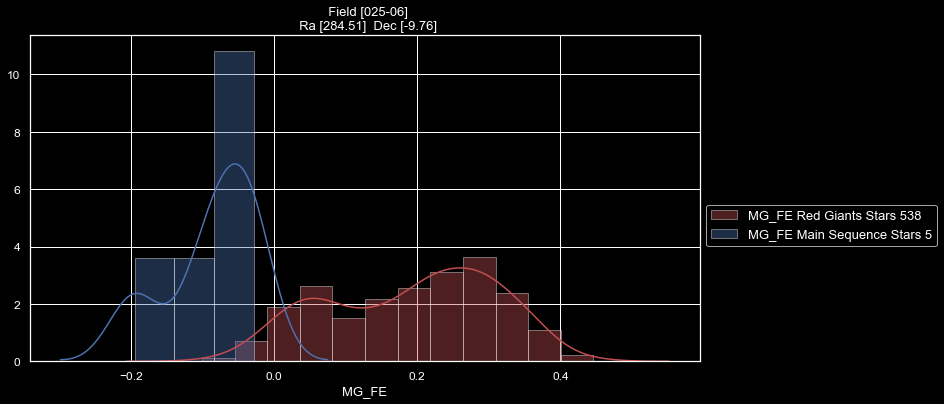


MG_FE Red Giants 0.19
MG_FE Main Sequence -0.09

MG_FE Red Giants kpc 17.4
MG_FE Main Sequence kpc 0.55


Field [149+62_MGA]  Ra [173.47]  Dec [51.02]

Stars: 264
main_sequence: 157
turnoff: 33
subgiants: 12
red_clump: 20
red_giants: 42

R_sun Max: 35.54


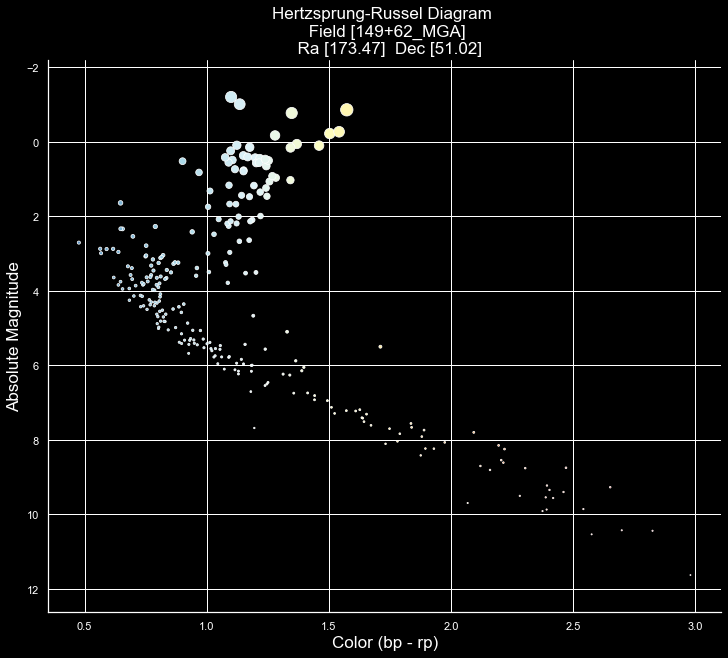

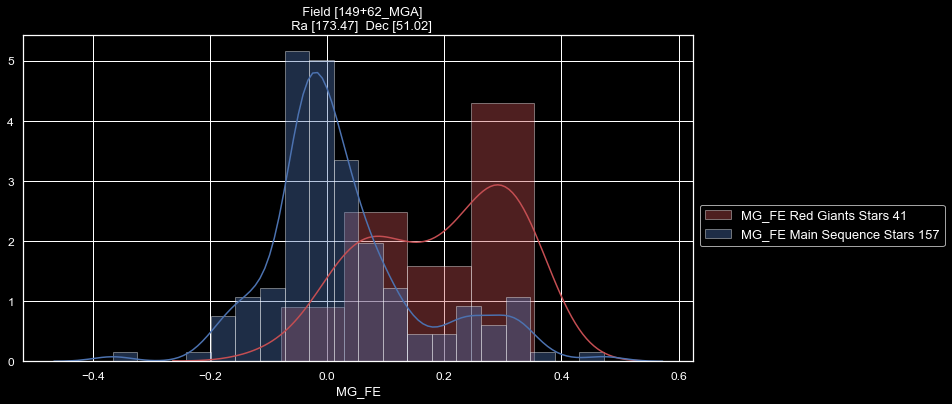


MG_FE Red Giants 0.19
MG_FE Main Sequence 0.03

MG_FE Red Giants kpc 2.13
MG_FE Main Sequence kpc 0.33


Field [075+35]  Ra [259.46]  Dec [48.39]

Stars: 264
main_sequence: 9
turnoff: 18
subgiants: 11
red_clump: 61
red_giants: 165

R_sun Max: 86740.92


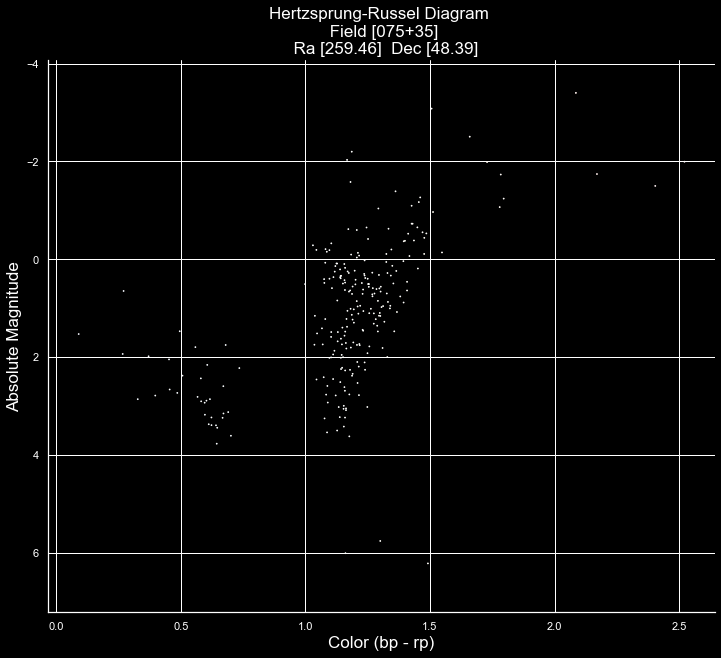

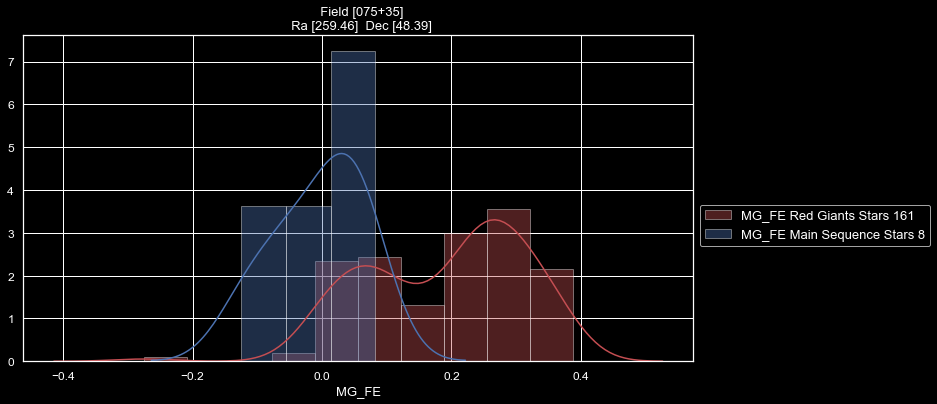


MG_FE Red Giants 0.19
MG_FE Main Sequence -0.01

MG_FE Red Giants kpc 63.15
MG_FE Main Sequence kpc 0.29


7 seconds elapsed

Done!


In [21]:
################################################################################################################################################

timer_start()


print("\nStarting HR Diagram Plotting Loop")


for field in alpha_field_list:

        f1 = df_Apogee[df_Apogee['FIELD'] == field]
        field_name = " "
        
        f1_ra = f1['RA'].mean()
        f1_dec = f1['DEC'].mean()
        field_list =  "Ra [" + str(round(f1_ra, 2)) + ']' + "  Dec [" + str(round(f1_dec, 2)) + ']'
        
        print('\n\n' + 'Field ['  + str(field)+ ']' + '  ' + str(field_list) )

        main_sequence = f1[f1['LOGG'].astype(float) > 4.20]
        turnoff       = f1[(f1['LOGG'].astype(float) < 4.20) & (f1['LOGG'].astype(float) > 3.90)]
        subgiants     = f1[(f1['LOGG'].astype(float) < 3.90) & (f1['LOGG'].astype(float) > 3.60)]
        red_clump     = f1[(f1['LOGG'].astype(float) < 2.55) & (f1['LOGG'].astype(float) > 2.35)]
        red_clump_id  = red_clump.APOGEE_ID.astype(str)
        reds          = f1[f1['LOGG'].astype(float) < 3.60]
        red_giants    = reds[~reds['APOGEE_ID'].isin(red_clump_id)]
        
        print("\nStars: " + str(f1.shape[0]))
        print("main_sequence: " + str(main_sequence.shape[0]))
        print("turnoff: " + str(turnoff.shape[0]))
        print("subgiants: " + str(subgiants.shape[0]))
        print("red_clump: " + str(red_clump.shape[0]))
        print("red_giants: " + str(red_giants.shape[0]))

        
        if f1.shape[0] > 10:
            
            print('\nR_sun Max: ' + str(f1['R_sun'].max()))
            
            sns.set()
            
            ### Plot 001
            rr1 = f1[(f1.R_sun > 0) & (f1.R_sun <= 100) ]
            plt.style.use('dark_background')
            sns.relplot(x='BP_RP', y='M', height=8.5, aspect=1.2, legend=None,
                        hue='BP_RP',
                        palette='RdYlBu_r',
                        size='R_sun',
                        sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
                        data=f1
                        )
            plt.ylim(rr1['M'].max()+1, rr1['M'].min()-1)
            plt.xlabel('Color (bp - rp)', fontsize = 17)
            plt.ylabel('Absolute Magnitude', fontsize = 17)
            plt.title('Hertzsprung-Russel Diagram ' +  '\n Field ['  + str(field)+ ']' + '\n  ' 
                      + str(field_list), fontsize = 17)
            plt.show()   
            
            
            
            
            ### Plot 002
            """sns.set()
            rr1 = f1[f1.R_sun > 0]
            plt.style.use('dark_background')
            sns.relplot(x='RA', y='DEC', height=8.5, aspect=1.2, legend=None,
                        hue='BP_RP',
                        palette='RdYlBu_r',
                        size='R_sun',
                        sizes=(1,rr1['R_sun'].max()/rr1['R_sun'].min()),
                        data=f1
                        )
            plt.xlabel('Ra', fontsize = 17)
            plt.ylabel('Dec', fontsize = 17)
            plt.title(' Field ['  + str(field)+ ']' + '\n  ' + str(field_list) + '\nStars: ' + str(f1.shape[0]), fontsize=15)
        
            plt.show()  """
            
                
            for element in element_cols3:
                ChartHistElement(red_giants, "Red Giants", main_sequence, "Main Sequence", element)
                
timer_stop()

print("\nDone!")